<h1>Solución Titanic</h1>
<h2>Introducción</h2>
<p>En este notebook se resuelve el problema del <a href="https://www.kaggle.com/c/titanic">Titanic</a>. En específicio, se desarrollarán las siguientes etapas:</p>

<ol>
<li><strong>Análisis de datos</strong></li>
    <ol>
        <li>Preguntas</li>
        <li>Data wrangling</li>
        <li>Exploratory data analysis</li>
        <li>Conclusiones</li>
    </ol>
<li><strong>Clasificación con Machine Learning</strong></li>
    <ol>
        <li>Pre-procesamiento de variables</li>
        <li>Train, validation y test sets</li>
        <li>3 modelos para clasificación</li>
        <li>Entrenamiento</li>
        <li>Diagnóstico</li>
        <li>Resultados</li>
    </ol>
</ol>

In [4]:
# Manipulacion de datos y tensores.
import numpy as np
import pandas as pd
# Aprendizaje automatico.
import sklearn
from sklearn.model_selection import train_test_split
# Visualizaciones.
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import seaborn as sns
# Retina command that makes things look good
%config InlineBackend.figure_format = 'retina'

<h2>1. Análisis de datos</h2>

<p style="text-justify;">Antes de aplicar <strong>Inteligencia Artificial</strong> analizaremos los datos siguiendo el proceso descrito previamente. En la primera fase, leeremos los datos y los cargaremos a una estructura de datos. Seguidamente, limpiaremos los datos utilizando estadística descriptiva para encontrar outliers y missing values. Despues, aplicaremos análisis de datos uni-variables y multi-variables con el fin de responder preguntas sobre el dataset. Finalmente, presentaremos conclusiones sobre nuestras preguntas.</p>

<h3>A. Preguntas</h3>
<p>En esta sección:</p>
<ol>
    <li>Propondemos preguntas sobre el dataset del Titanic.</li>
</ol>

<h4></h4>
<ol>
    <li>Cual es el sexo que tuvo mayor opcion de sobrevivir?.</li>
    <li>Cual es el rango de edad que tuvo mayor opcion de sobrevivir?</li>
    <li>Que clase social tenia mas oportunidad de sobrevivir?</li>
</ol>

<h3>B. Data wrangling</h3>
<p>En esta sección:</p>
<ol>
    <li>Cargaremos los datos a una estructura de datos</li>
    <li>Exploraremos cada variable del dataset</li>
    <li>Limpiaremos las variables del dataset</li>
</ol>

In [5]:
# Cargar datos
df_original = pd.read_csv("data/train.csv")

In [6]:
# Leer datos
df_original.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<p>Las features PassengerId, Name, Cabin, Embarked, Parch no tienen relacion con la variable de salida. Es decir, el id de identificacion de cada pasajero no decidira la muerte de un pasajero. El nombre de un pasajero tampoco interferira con su posibilidad de supervivencia. Asimismo, el numero de cabina o el puerto de abordo al barco tampoco afectan la supervivencia del pasajero. Por tanto eliminamos estas variables.</p>

In [7]:
df_dropped_features = df_original.drop(["PassengerId", "Name", "Cabin", "Embarked", "Parch", "Ticket"], axis = 1)
df_dropped_features.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


<p>Antes de seguir con el analisis de datos, debemos transformar las features con valores no numericos. Estas features son Sex y Ticket. Veamos las siguientes celdas para entender la situacion.</p>

<h4>Feature Sex</h4>

In [8]:
# Veamos las clases unicas de la variable Sex.
print("Clases unicas: ", df_dropped_features["Sex"].unique())
print("Cantidad de variables unicas: ", len(df_dropped_features["Sex"].unique()))

Clases unicas:  ['male' 'female']
Cantidad de variables unicas:  2


<p>Como se puede observar, la variable de sexo esta compuesta por dos categorias o clases: male y female. Asimismo, la variable ticket esta compuesta por 681 categorias (el tipo de ticket nos sirve porque tiene correlacion con la la clase social a la cual el pasajero pertenece).</p>
<h4>Categorizacion de feature sex</h4>

In [9]:
# Categorizamos las features con el metodo get_dummies
df_categorized = pd.get_dummies(df_dropped_features)
df_categorized.head()

,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male
0,0,3,22.0,1,7.2500,0,1
1,1,1,38.0,1,71.2833,1,0
2,1,3,26.0,0,7.9250,1,0
3,1,1,35.0,1,53.1000,1,0
4,0,3,35.0,0,8.0500,0,1


In [10]:
# Cuantas features tenemos?
print("Features:", [i for i in df_categorized.columns], "\n")
print("Cantidad total de features: ", len(df_categorized.columns))

Features: ['Survived', 'Pclass', 'Age', 'SibSp', 'Fare', 'Sex_female', 'Sex_male'] 

Cantidad total de features:  7


<p>Utilizemos variables descriptivas para analizar los datos:</p>

In [11]:
df_categorized.describe()

,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,32.204208,0.352413,0.647587
std,0.486592,0.836071,14.526497,1.102743,49.693429,0.477990,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200,1.000000,1.000000


<h3>Conclusiones sobre la tabla</h3>
<o>
    <li>Con respecto a la cantidad de datos por feature podemos concluir que la feature Age tiene una menor cantidad de datos. Por tanto, probablemente hay valores nan.</li>
</o>

<h2>Limpieza de datos</h2>

<h3>Ejercicio</h3>
<p>Debemos limpiar los valores nan en la feature edad de nuestros datos. Tenemos varias opciones:</p>
<ol>
    <li><strong>OPCION 1</strong> Rellenar los valores nan con la <strong>media</strong> de las edades.</li>
    <li><strong>OPCION 2</strong> Rellenar los valores nan con la <strong>mediana</strong> de las edades.</li>
    <li><strong>OPCION 3</strong> Eliminar las filas con los valores nan.</li>
</ol>
<p>Por el momento tu trabajo es escoger una de las estrategias. Mas adelante evaluaras tus resultados al aplicar un algoritmo de machine learning para predecir el test set.</p>

In [12]:
# ESCOJE UNA OPCION.
opcion = 1 # LLena la variable con uno de los siguientes numeros: 1, 2, 3

# Assertions.
assert (type(opcion) == int), "La variable opcion debe ser un entero."
assert ((opcion in [1,2,3]) == True), "opcion debe tener un valor entre [1, 2, 3]"

# Local variables
df_cleaned = df_categorized.copy()

# Opciones de limpieza para valores nan.
if (opcion == 1):
    media_edad = df_categorized["Age"].mean()
    df_cleaned["Age"] = df_categorized["Age"].fillna(media_edad)
elif (opcion == 2):
    mediana_edad = df_categorized["Age"].median()
    df_cleaned["Age"] = df_categorized["Age"].fillna(mediana_edad)
elif (opcion == 3):
    df_cleaned["Age"] = df_categorized.dropna(axis = 1)

<h3>C. Exploratory data analysis</h3>
<p>En esta sección:</p>
<ol>
    <li>Responderemos a las preguntas formuladas previamente</li>
</ol>

<h4>Cual es el sexo que tuvo mayor opcion de sobrevivir?</h4>
<p>La siguiente celda tiene codigo que te ayudara a graficar mas sencillamente.</p>

In [13]:
def plot_with_bar(values = None, title = None, xticks = None):
    # Assertions
    if (values == None):
        raise ValueError("Values no puede estar vacio.")
    if (type(values) == list) or (type(values) == tuple):
        pass
    else:
        raise TypeError("Values debe ser una lista o tupla.")
    ind = [i for i in range(len(values))]
    plt.bar(ind, values)
    plt.title(title)
    plt.xticks(ind, xticks)
    plt.show()

Cantidad de hombres:  577
Cantidad de mujeres:  314
Cantidad total de pasajeros:  891


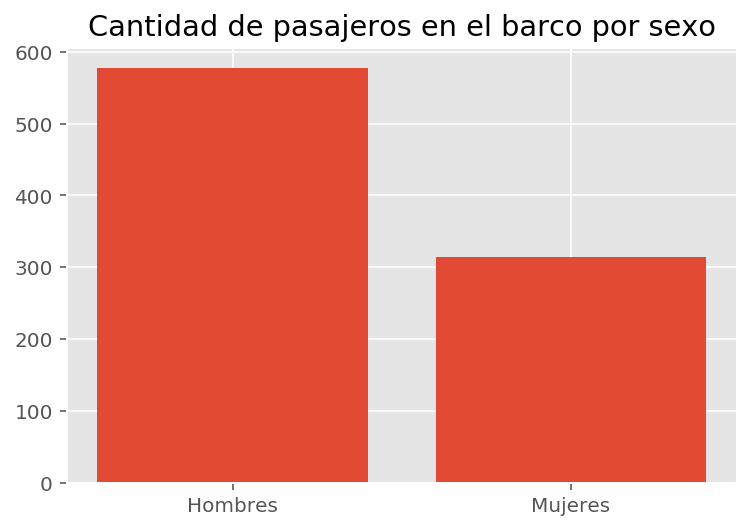

In [14]:
# Cuantos hombres y mujeres habian entre pasajeros.
male = df_cleaned.query("Sex_male == 1")
female = df_cleaned.query("Sex_female == 1")
print("Cantidad de hombres: ", male.shape[0])
print("Cantidad de mujeres: ", female.shape[0])
print("Cantidad total de pasajeros: ", df_original.shape[0])
# Plot a bar
plot_with_bar(values = [male.shape[0], female.shape[0]], 
              title = "Cantidad de pasajeros en el barco por sexo", 
              xticks = ["Hombres", "Mujeres"])

Mujeres
Mujeres sobrevivieron:  233
Mujeres no sobrevivieron:  81


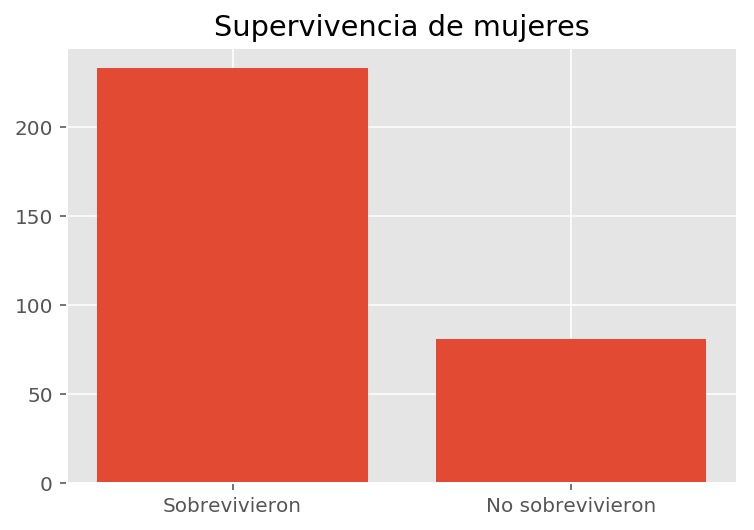


Hombres
Hombres sobrevivieron:  109
Hombres no sobrevivieron:  468


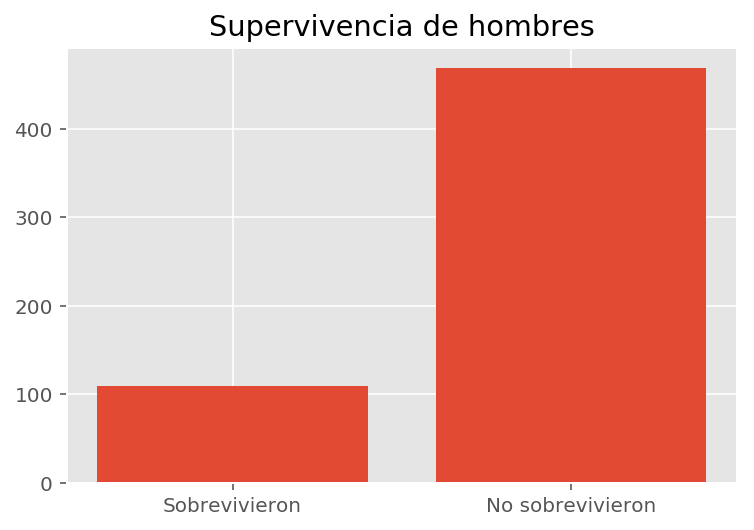

In [15]:
# Del numero total de mujeres, cuantas sobrevivieron y cuantas no.
females_survived = df_cleaned.query("Survived == 1 and Sex_female == 1")
females_not_survived = df_cleaned.query("Survived == 0 and Sex_female == 1")
# Del numero total de hombres, cuantos sobrevivieron y cuantos no.
males_survived = df_cleaned.query("Survived == 1 and Sex_male == 1")
males_not_survived = df_cleaned.query("Survived == 0 and Sex_male == 1")
# Print
print("Mujeres")
print("Mujeres sobrevivieron: ", females_survived.shape[0])
print("Mujeres no sobrevivieron: ", females_not_survived.shape[0])
plot_with_bar(values = [females_survived.shape[0], females_not_survived.shape[0]], 
              title = "Supervivencia de mujeres", 
              xticks = ["Sobrevivieron", "No sobrevivieron"])
print("\nHombres")
print("Hombres sobrevivieron: ", males_survived.shape[0])
print("Hombres no sobrevivieron: ", males_not_survived.shape[0])
plot_with_bar(values = [males_survived.shape[0], males_not_survived.shape[0]], 
              title = "Supervivencia de hombres", 
              xticks = ["Sobrevivieron", "No sobrevivieron"])

<h4>Respuesta</h4>
<ol>
    <li>Determinar la cantidad de pasajeros nos permitio concluir que hubo una mayor cantidad de hombres con respecto a mujeres en el barco.</li>
    <li>Seguidamente obtuvimos una cantidad de 233 de 314 mujeres que sobrevivieron. Por tanto, si eras mujer tenias un 74% de probabilidad de sobrevivir.</li>
    <li>Despues obtuvimos una cantidad de 109 de 577 hombres que sobrevivieron. Por tanto, si eras hombre tenias un 18% de probabilidad de sobrevivir.</li>
    <li>Ademas, podemos agregar estos datos y determinar que 341 de 891 pasajeros sobrevivieron al accidente. Esto representa 38% del total de personas en el barco, menos de la mitad.</li>
</ol> 

<h4>Cual es el rango de edad que tuvo mayor opcion de sobrevivir?</h4>

In [16]:
# Primero veamos el rango de edades.
df_cleaned["Age"].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

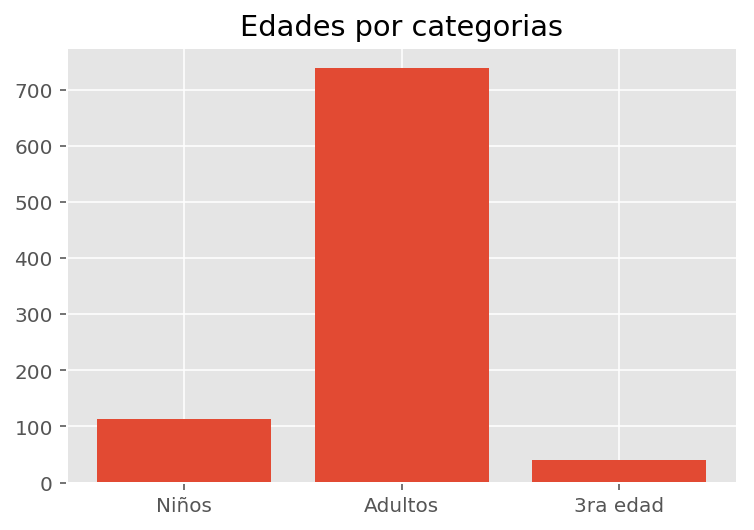

In [17]:
# Podemos observar que la edad minima es 0.42 y la edad maxima es 80. 
# Crearemos tres categorias para segmentar los pasajeros.
children = df_cleaned.query("Age < 18")
adults = df_cleaned.query("Age >= 18 and Age <= 55")
elder = df_cleaned.query("Age > 55 and Age <= 80")
# Grafiquemos los datos.
plot_with_bar(values = [children.shape[0], adults.shape[0], elder.shape[0]],
              title = "Edades por categorias",
              xticks = ["Niños", "Adultos", "3ra edad"])

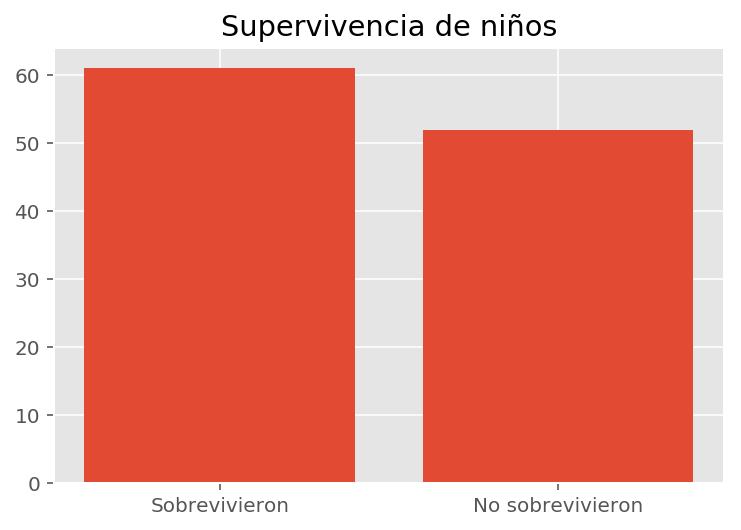

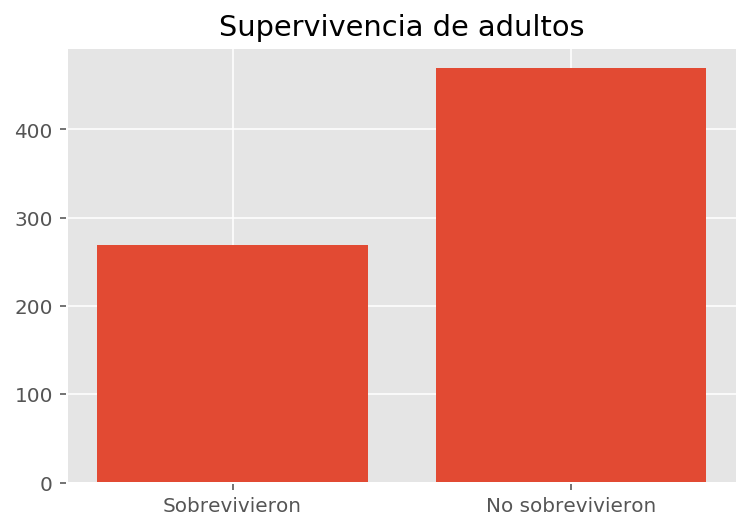

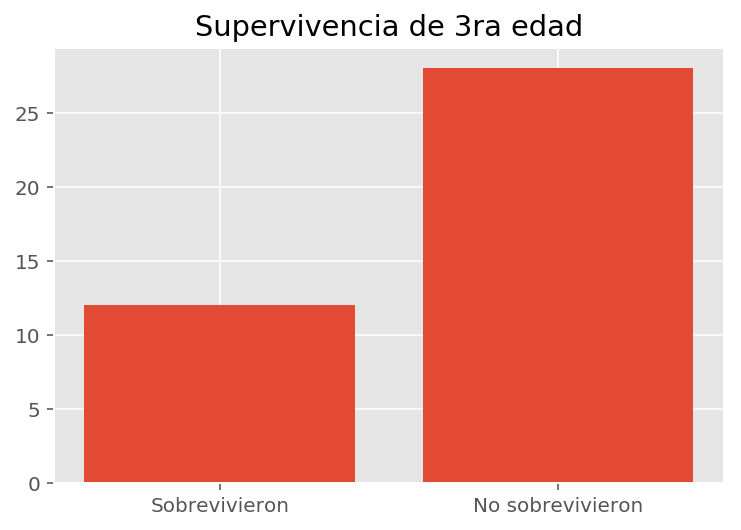

Supervivencia niños:  53.982
Supervivencia adultos:  36.449
Supervivencia 3ra edad:  30.0


In [18]:
# Ahora veamos la cantidad de ninos, adultos y 3ra edad que sobrevivieron.
children_survived = children.query("Survived == 1")
children_not_survived = children.query("Survived == 0")
adults_survived = adults.query("Survived == 1")
adults_not_survived = adults.query("Survived == 0")
elder_survived = elder.query("Survived == 1")
elder_not_survived = elder.query("Survived == 0")
per_ch_surv = (children_survived.shape[0] / (children_survived.shape[0] + children_not_survived.shape[0]))*100
per_ad_surv = (adults_survived.shape[0] / (adults_survived.shape[0] + adults_not_survived.shape[0]))*100
per_el_surv = (elder_survived.shape[0] / (elder_survived.shape[0] + elder_not_survived.shape[0]))*100
# Grafiquemos los datos
plot_with_bar(values = [children_survived.shape[0], children_not_survived.shape[0]],
              title = "Supervivencia de niños",
              xticks = ["Sobrevivieron", "No sobrevivieron"])
plot_with_bar(values = [adults_survived.shape[0], adults_not_survived.shape[0]],
              title = "Supervivencia de adultos",
              xticks = ["Sobrevivieron", "No sobrevivieron"])
plot_with_bar(values = [elder_survived.shape[0], elder_not_survived.shape[0]],
              title = "Supervivencia de 3ra edad",
              xticks = ["Sobrevivieron", "No sobrevivieron"])
print("Supervivencia niños: ", str(per_ch_surv)[:6])
print("Supervivencia adultos: ", str(per_ad_surv)[:6])
print("Supervivencia 3ra edad: ", per_el_surv)

<h4>Respuesta</h4>
<ol>
    <li>Los niños tenian un 53% porcentaje de supervivencia.</li>
    <li>Los adultos tenian un 36% porcentaje de supervivencia.</li>
    <li>Los 3ra eda tenian un 30% porcentaje de supervivencia.</li>
    <li>En conclusion, los niños tenian una mayor ventaja en supervivencia.</li>
</ol> 

<h4>Que clase social tenia una mayor posibilidad de supervivencia?</h4>

In [19]:
# Veamos lost tipos de clases sociales.
print("Tres tipos de clases: ", df_cleaned["Pclass"].unique())

Tres tipos de clases:  [3 1 2]


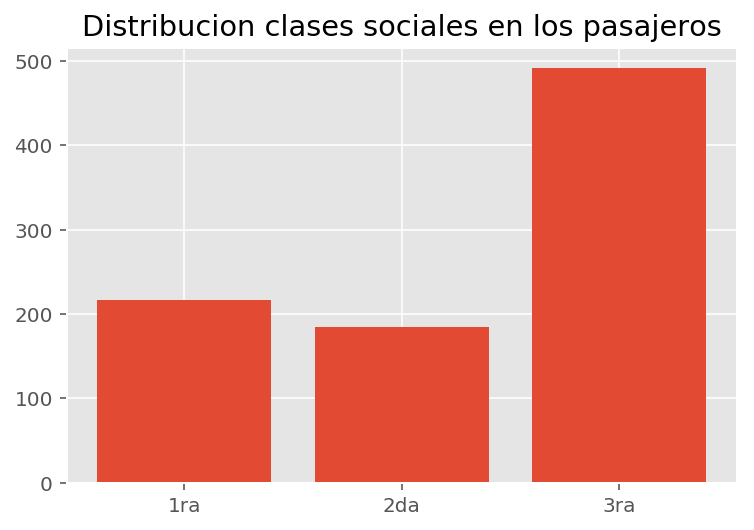

In [20]:
# Veamos la distribucion de clases en el barco.
first_class = df_cleaned.query("Pclass == 1")
second_class = df_cleaned.query("Pclass == 2")
third_class = df_cleaned.query("Pclass == 3")
# Plots.
plot_with_bar(values = [first_class.shape[0], second_class.shape[0], third_class.shape[0]],
              title = "Distribucion clases sociales en los pasajeros",
              xticks = ["1ra", "2da", "3ra"])

Supervivencia 1ra clase:  0.6296296296296297
Supervivencia 2da clase:  0.47282608695652173
Supervivencia 3ra clase:  0.24236252545824846


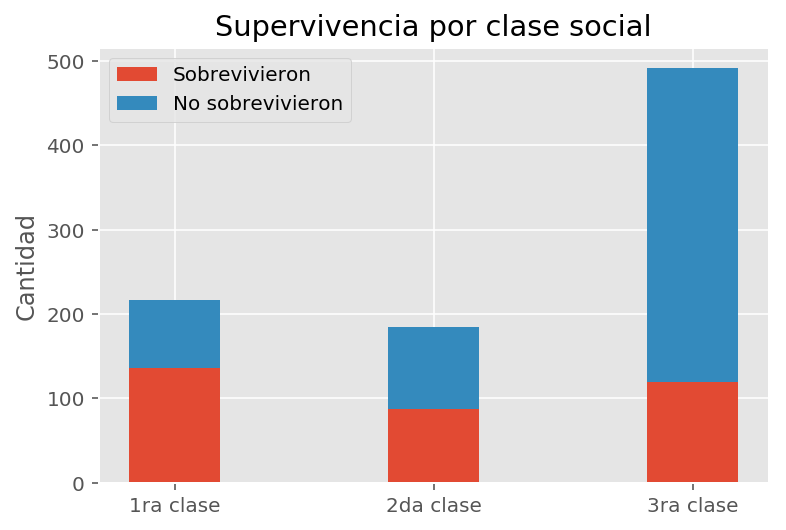

In [21]:
# Ahora veamos el porcentaje de supervivencia de cada clase.
first_class_survived = first_class.query("Survived == 1")
first_class_not_survived = first_class.query("Survived == 0")
second_class_survived = second_class.query("Survived == 1")
second_class_not_survived = second_class.query("Survived == 0")
third_class_survived = third_class.query("Survived == 1")
third_class_not_survived = third_class.query("Survived == 0")
print("Supervivencia 1ra clase: ", (first_class_survived.shape[0] / (first_class_survived.shape[0] + first_class_not_survived.shape[0])))
print("Supervivencia 2da clase: ", (second_class_survived.shape[0] / (second_class_survived.shape[0] + second_class_not_survived.shape[0])))
print("Supervivencia 3ra clase: ", (third_class_survived.shape[0] / (third_class_survived.shape[0] + third_class_not_survived.shape[0])))
# Grafiquemos.
survived = (first_class_survived.shape[0], second_class_survived.shape[0], third_class_survived.shape[0])
not_survived = (first_class_not_survived.shape[0], second_class_not_survived.shape[0], third_class_not_survived.shape[0])
ind = np.arange(3)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, survived, width)
p2 = plt.bar(ind, not_survived, width, bottom=survived)
plt.ylabel("Cantidad")
plt.title("Supervivencia por clase social")
plt.xticks(ind, ("1ra clase", "2da clase", "3ra clase"))
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ("Sobrevivieron", "No sobrevivieron"))
plt.show()

<h4>Respuesta</h4>
<ol>
    <li>La tercera clase doblaba a la 2da y 1ra clase en cantidad de pasajeros.</li>
    <li>Si eras de 1ra clase tenias un 62% de supervivencia.</li>
    <li>Si eras de 2da clase tenias un 47% de supervivencia.</li>
    <li>Si eras de 3ra clase tenias un 24% de supervivencia.</li>   
</ol>

<h3>D. Conclusiones</h3>
<p>En esta sección:</p>
<ol>
    <li>Presentaremos las conclusiones de nuestro estudio</li>
</ol>

<p>Las conclusiones son las respuestas a las preguntas previas.</p>
<h5>Puedes agregar mas conclusiones?</h5>

<ol>
    <li>Si eras un adulto mujer de primera clase tenias la mayor posibilidad de sobrevivir.</li>
    <li>Claramente se dió prioridad a las personas de primera clase.</li>
</ol>

<h2>2. Clasificación con Machine Learning</h2>

<h3>A. Pre-procesamiento de variables</h3>

In [22]:
# Dividimos la matriz en X y Y.
Y = df_cleaned["Survived"]
X = df_cleaned.drop("Survived", axis = 1)
print(X.shape, Y.shape)

(891, 6) (891,)


<h3>B. Train, validation y test sets</h3>
<h3>EJERCICIO</h3>
<p>Debes escoger el porcentaje de datos que ocupara el training set y lo mismo para el validation set. Recuerda los valores que vimos en clase.</p>
<p><strong>Nota: </strong>En esta ocacion solo necesitamos un train set y un validation set. El test set lo provee Kaggle.</p>

In [23]:
# TRAIN SIZE Y VALIDATION SIZE deben sumar 1.0. 
# Por ejemplo: TRAIN_SIZE = 0.5 y VALIDATION_SIZE = 0.5
TRAIN_SIZE = 0.7 # ESCOJE EL VALOR DEL TRAINING SET
VALIDATION_SIZE = 0.3 # ESCOJE EL VALOR DEL VALIDATION SET
assert TRAIN_SIZE+VALIDATION_SIZE==1.0, "TRAIN SIZE y VALIDATION SIZE deben sumar 1.00"

In [24]:
# Training y validation set.
x_train, x_validation, y_train, y_validation = train_test_split(X, Y, test_size=VALIDATION_SIZE, random_state=42)
print("Tamaños train set: ", x_train.shape, y_train.shape)
print("Tamaños validation set: ", x_validation.shape, y_validation.shape)

Tamaños train set:  (623, 6) (623,)
Tamaños validation set:  (268, 6) (268,)


<h3>C. Modelos para clasificación</h3>
<h3>Ejercicios</h3>
<p>Tu trabajo es entrenar los modelos de aprendizaje automatico evitando el overfitting y underfitting. Para lo cual analizaras la precision de tu modelo utilizando el train y el validation set. <strong>Recuerda que ambas precisiones deben estar lo mas cerca posible entre ellas para obtener un buen resultado.</strong></p>

<h3>Random forest</h3>
<p>Utiliza la documentacion en el siguiente link para tunear los parametros de un random forest: <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">Random forest</a></p>

In [29]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
randForClf = RandomForestClassifier(n_estimators = 400, # CAMBIA EL VALOR DE ESTE PARAMETRO 400
                             max_features = 0, # CAMBIA EL VALOR DE ESTE PARAMETRO auto
                             max_depth = 10, # CAMBIA EL VALOR DE ESTE PARAMETRO 10
                             min_samples_leaf = 1, # CAMBIA EL VALOR DE ESTE PARAMETRO 1
                             min_samples_split = 3) # CAMBIA EL VALOR DE ESTE PARAMETRO 3
randForClf.fit(x_train, y_train)

ValueError: max_features must be in (0, n_features]

<p>Utiliza la siguiente celda para debugear tu entrenamiento. Recuerda que el score del training y el validation deben estar lo mas cerca posible.</p>

In [46]:
print("Score en training set: ", randForClf.score(x_train, y_train))
print("Score en validation set: ", randForClf.score(x_validation, y_validation))

Score en training set:  0.9197431781701445
Score en validation set:  0.8283582089552238


<h3>SVM</h3>
<p>Utiliza la documentacion en el siguiente link para tunear los parametros de un SVM: <a href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a></p>
<br>
<p>Puedes escoger entre los siguientes tipos de kernel: </p>
<ol>
    <li>"linear"</li>
    <li>"rbf"</li>
    <li>"sigmoid"</li>    
</ol>

In [124]:
# SVM
from sklearn.svm import SVC
svcclf = SVC(kernel = "linear") # ESCOJE EL TIPO DE KERNEL DE EN ESTE PARAMETRO
svcclf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [125]:
print("Score en training set: ", svcclf.score(x_train, y_train))
print("Score en validation set: ", svcclf.score(x_validation, y_validation))

Score en training set:  0.7849117174959872
Score en validation set:  0.7910447761194029


<h3>Adaboost</h3>
<p>Utiliza la documentacion en el siguiente link para tunear los parametros de un Adaboost: <a href="http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_hastie_10_2.html#sphx-glr-auto-examples-ensemble-plot-adaboost-hastie-10-2-py">Adaboost</a></p>

In [119]:
# Adaboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier
# Clasifier
treeclf = DecisionTreeClassifier(max_depth= 7, # ESCOJE EL MAX DEPTH
                                 min_samples_leaf= 2) # ESCOJE EL MIN SAMPLES LEAF
treeclf.fit(x_train, y_train)
adareal = AdaBoostClassifier(
    base_estimator=treeclf,
    learning_rate = 0.49, # ESCOJE UNA TASA DE APRENDIZAJE
    n_estimators = 400, # ESCOJE UN NUMERO DE ESTIMADORES
    algorithm="SAMME.R")
adareal.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.49, n_estimators=400, random_state=None)

In [120]:
print("Score en training set: ", adareal.score(x_train, y_train))
print("Score en validation set: ", adareal.score(x_validation, y_validation))

Score en training set:  0.9791332263242376
Score en validation set:  0.8171641791044776


<h3>F. Resultados</h3>
<p>Cuando creas que tus resultados son correctos. Prueba con el test set provisto por Kaggle. Para esto corre el codigo de las siguientes celdas.</p>

<h3>EJERCICIO</h3>
<p>Escribe tu nombre y la version de tu archivo en las siguientes variables.</p>

In [137]:
your_name = "Gloria" # ESCRIBE TU NOMBRE AQUI
your_version = "2" # ESCRIBE LA VERSION DE TU ARHIVO

In [138]:
# Leer datos de entrada.
df_test_set = pd.read_csv("data/test.csv")
df_passenger_id = df_test_set["PassengerId"]
# Eliminar features que no usamos.
df_test_set = df_test_set.drop(["PassengerId", "Name", "Cabin", "Embarked", "Parch", "Ticket"], axis = 1)
# Limpiar datos.
if (opcion == 1):
    df_test_set["Age"] = df_test_set["Age"].fillna(df_test_set["Age"].mean())
    df_test_set["Fare"] = df_test_set["Fare"].fillna(df_test_set["Fare"].mean())
elif (opcion == 2):
    df_test_set["Age"] = df_test_set["Age"].fillna(df_test_set["Age"].median())
    df_test_set["Fare"] = df_test_set["Fare"].fillna(df_test_set["Fare"].median())
elif (opcion == 3):
    df_test_set = df_test_set.dropna(axis = 1)
# Categorizar variables.
df_test_set = pd.get_dummies(df_test_set)
# Preprocesar datos.
x_test = df_test_set

<h3>ESCRIBE EL NOMBRE DEL MODELO QUE ESCOJES PARA EL TEST SET EN LA SIGUIENTE CELDA.</h3>
<p>Opciones:</p>
<ol>
    <li>"Random forests"</li>
    <li>"SVM"</li>
    <li>"Adaboost"</li>
</ol>

In [140]:
# Escribe aqui el nombre de tu modelo.
MODELO_ESCOGIDO = "Random forests" # ESCRIBE EL MODELO EN UN STRING
# Procesar resultados del modelo
if (MODELO_ESCOGIDO == "Random forests"):
    resultados = randForClf.predict(x_test)
elif (MODELO_ESCOGIDO == "SVM"):
    resultados = svcclf.predict(x_test)
elif (MODELO_ESCOGIDO == "Adaboost"):
    resultados = adareal.predict(x_test)
else:
    print("El nombre no es valido")
# Escribir archivo de salida.
file = open("data/enviar_archivo_" + your_name + "_" + your_version + "_kaggle.csv", "w")
file.write("PassengerId,Survived\n")
for i, j in zip(df_passenger_id, resultados):
    file.write(str(i) + "," + str(j) +"\n")
file.close()

<p>El archivo con tus resultados se encuentra en la carpeta data y se llama: <strong>enviar_archivo_YOURNAME_YOURVERSION_kaggle.csv</strong></p>
<p>La siguiente imagen te guiara donde debes enviar tu archivo en kaggle.</p>
![](kaggle_submission.png?raw=true)